In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
X = df.iloc[:,:-1].values
y=df.iloc[:,-1].values

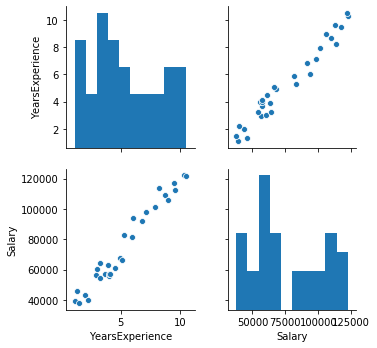

In [7]:
sns.pairplot(df)
# Divides equally so we can use linear regression

In [8]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

In [9]:
# Trainnig the data
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
pd.DataFrame(lm.coef_,index = ['YearsExperience'],columns = ['1 unit increase results in '])

,1 unit increase results in
YearsExperience,9577.17175


In [12]:
predictions = lm.predict(X_test)

In [13]:
# input YearsExperience and get the predicted salary
result = lm.predict([[1.2]]) # 2D array as predict takes 2D array
print(result)

[37468.42075924]


In [21]:
score=lm.score(X_test,y_test)
print(score*100)

97.46363787521535


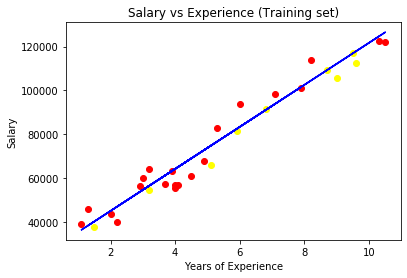

In [26]:
# Checking using the training Set
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'yellow')
plt.plot(X_train, lm.predict(X_train), color = 'blue') # To mark straight Line
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

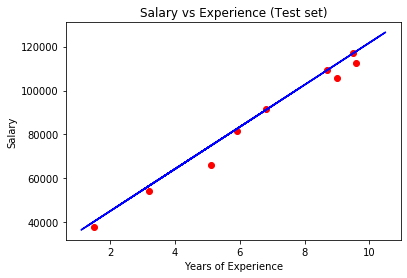

In [27]:
# Checking using Test Set
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, lm.predict(X_train), color = 'blue')  # To mark straight Line
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

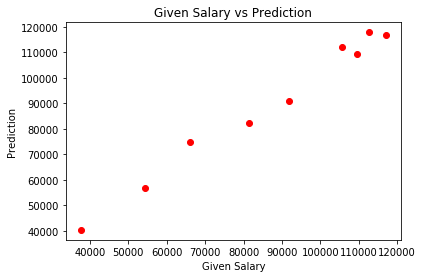

In [30]:
plt.scatter(y_test, predictions, color = 'red')
plt.title('Given Salary vs Prediction')
plt.xlabel('Given Salary')
plt.ylabel('Prediction')
plt.show()